In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix





In [2]:
file_path = "Alphabets_data.csv"   
df = pd.read_csv(file_path)


In [3]:
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values per Column:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['letter'].value_counts())

Dataset Shape: (20000, 17)

Columns: ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge', 'yedgex']

Missing Values per Column:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

Class Distribution:
 letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64


In [4]:
display(df.head())

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


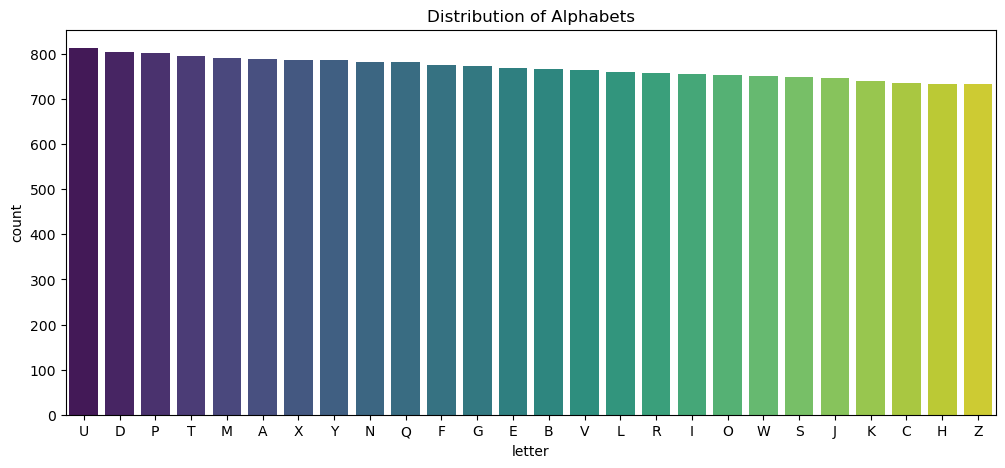

In [7]:
plt.figure(figsize=(12,5))
sns.countplot(x='letter', data=df, order=df['letter'].value_counts().index, palette="viridis")
plt.title("Distribution of Alphabets")
plt.show()

In [8]:
X = df.drop('letter', axis=1)
y = df['letter']

if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("Encoded Classes:", dict(zip(le.classes_, le.transform(le.classes_))))

Encoded Classes: {'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2), 'D': np.int64(3), 'E': np.int64(4), 'F': np.int64(5), 'G': np.int64(6), 'H': np.int64(7), 'I': np.int64(8), 'J': np.int64(9), 'K': np.int64(10), 'L': np.int64(11), 'M': np.int64(12), 'N': np.int64(13), 'O': np.int64(14), 'P': np.int64(15), 'Q': np.int64(16), 'R': np.int64(17), 'S': np.int64(18), 'T': np.int64(19), 'U': np.int64(20), 'V': np.int64(21), 'W': np.int64(22), 'X': np.int64(23), 'Y': np.int64(24), 'Z': np.int64(25)}


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("\nScaled Features Shape:", X_scaled.shape)
display(X_scaled.head())


Scaled Features Shape: (20000, 16)


,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,-1.057698,0.291877,-1.053277,-0.164704,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-1.305948,-0.219082,-1.438153,0.122911
1,0.510385,1.502358,-1.053277,0.719730,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.448492,-0.219082,0.120081,1.359441
2,-0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.019764,-0.865626,-0.269477,0.741176
3,1.555774,1.199738,0.435910,0.277513,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.266419,1.074008,-0.659036,0.122911
4,-1.057698,-1.826464,-1.053277,-1.933571,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.877220,-0.865626,0.509640,1.359441


In [10]:
X = df.drop('letter', axis=1)
y = df['letter']


In [11]:
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

y_categorical = to_categorical(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y
)


In [13]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),   # hidden layer
    Dense(32, activation='relu'),                               
    Dense(y_categorical.shape[1], activation='softmax')         
])

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5178 - loss: 1.7967 - val_accuracy: 0.7075 - val_loss: 1.0565
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7359 - loss: 0.9014 - val_accuracy: 0.7682 - val_loss: 0.7877
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7921 - loss: 0.7080 - val_accuracy: 0.8080 - val_loss: 0.6440
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8248 - loss: 0.5928 - val_accuracy: 0.8360 - val_loss: 0.5548
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8499 - loss: 0.5129 - val_accuracy: 0.8528 - val_loss: 0.4939
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8671 - loss: 0.4518 - val_accuracy: 0.8727 - val_loss: 0.4366
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8797 - loss: 0.4041 - val_accuracy: 0.8798 - val_loss: 0.4010
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8919 - loss: 0.3669 - val_accuracy: 0.

In [15]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n Test Accuracy: {accuracy:.4f}")

plt.figure(figsize=(12,5))


 Test Accuracy: 0.9227


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

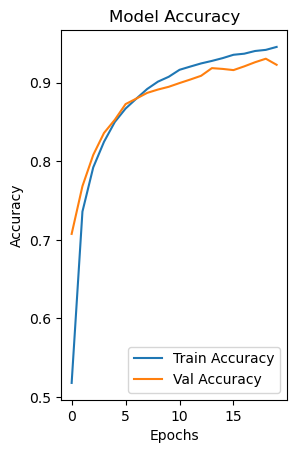

In [16]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


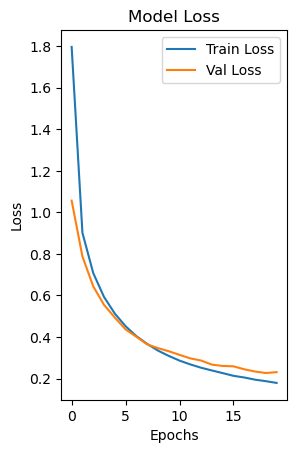

In [17]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
def build_model(hidden_layers=1, neurons=32, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    for _ in range(hidden_layers-1):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(y_categorical.shape[1], activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [22]:
model_clf = KerasClassifier(model=build_model, verbose=0)


In [23]:
param_dist = {
    'hidden_layers': [1, 2, 3],
    'neurons': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

In [24]:
random_search = RandomizedSearchCV(
    estimator=model_clf,
    param_distributions=param_dist,
    n_iter=5,   # 🔹 increase this for more thorough search
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [25]:
import sklearn
import scikeras




In [26]:
pip install --upgrade scikit-learn scikeras


Note: you may need to restart the kernel to use updated packages.


In [27]:
from scikeras.wrappers import KerasClassifier

def build_model(hidden_layers=1, neurons=32, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    for _ in range(hidden_layers-1):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(y_categorical.shape[1], activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model


model_clf = KerasClassifier(
    model=build_model,
    hidden_layers=1,
    neurons=32,
    activation="relu",
    learning_rate=0.001,
    epochs=10,
    batch_size=32,
    verbose=0
)


In [31]:
y_pred_baseline = model.predict(X_test)  # model = ANN trained before tuning
y_pred_baseline_classes = np.argmax(y_pred_baseline, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("🔹 Baseline ANN Performance:\n")
print("Accuracy:", accuracy_score(y_true_classes, y_pred_baseline_classes))
print("Precision (macro):", precision_score(y_true_classes, y_pred_baseline_classes, average='macro'))
print("Recall (macro):", recall_score(y_true_classes, y_pred_baseline_classes, average='macro'))
print("F1-score (macro):", f1_score(y_true_classes, y_pred_baseline_classes, average='macro'))
print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_baseline_classes))

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
🔹 Baseline ANN Performance:

Accuracy: 0.92275
Precision (macro): 0.923817702296141
Recall (macro): 0.9222785477806394
F1-score (macro): 0.9224697425709126

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       158
           1       0.83      0.90      0.86       153
           2       0.92      0.96      0.94       147
           3       0.91      0.93      0.92       161
           4       0.89      0.92      0.91       154
           5       0.92      0.92      0.92       155
           6       0.94      0.86      0.90       155
           7       0.87      0.82      0.84       147
           8       0.94      0.86      0.90       151
           9       0.95      0.93      0.94       149
          10       0.95      0.90      0.92       148
          11       0.94      0.95      0.94       152
          12       0.99      0.92      0.95       158
          13       

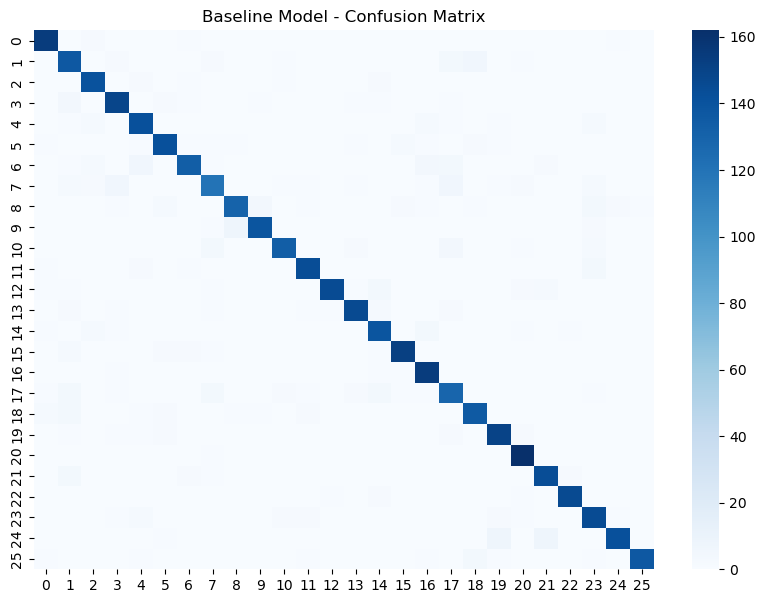

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_true_classes, y_pred_baseline_classes), 
            annot=False, cmap="Blues")
plt.title("Baseline Model - Confusion Matrix")
plt.show()

In [33]:
best_model = build_model(hidden_layers=2, neurons=64, activation='relu', learning_rate=0.001)
best_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5723 - loss: 1.5828    
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7811 - loss: 0.7543  
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8299 - loss: 0.5850  
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8572 - loss: 0.4868  
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8769 - loss: 0.4166  
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8930 - loss: 0.3645  
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9009 - loss: 0.3221  
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9132 - loss: 0.2894  
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9212 - loss: 0.2602  
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9259 - loss: 0.2385  
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9327 - loss: 0.2195  
Epoch 12/20
500/500 ━━━━━━━━

In [34]:
y_pred_tuned = best_model.predict(X_test)
y_pred_tuned_classes = np.argmax(y_pred_tuned, axis=1)

print("Accuracy:", accuracy_score(y_true_classes, y_pred_tuned_classes))
print("F1-score (macro):", f1_score(y_true_classes, y_pred_tuned_classes, average='macro'))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
Accuracy: 0.942
F1-score (macro): 0.9418618194743194


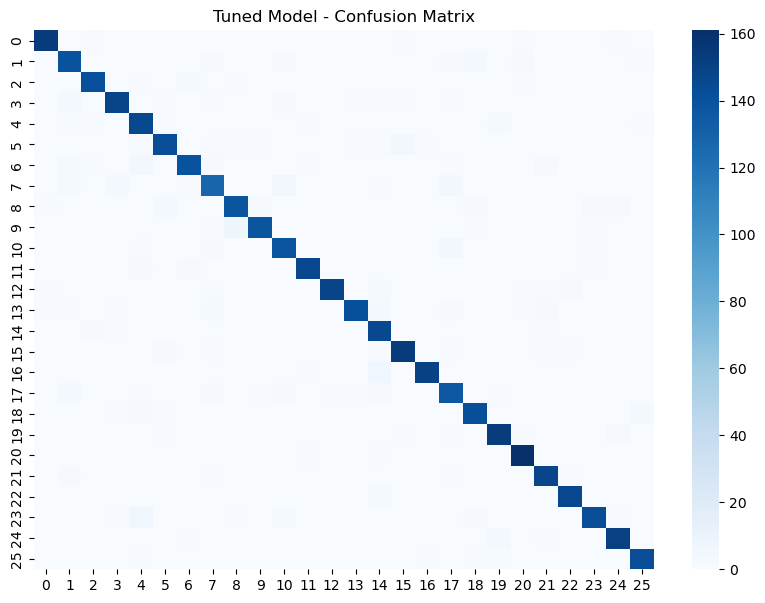

In [44]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_true_classes, y_pred_tuned_classes), 
            annot=False, cmap="Blues")
plt.title("Tuned Model - Confusion Matrix")
plt.show()